[View in Colaboratory](https://colab.research.google.com/github/renanfilipe/meteor-tutorial-shortLink/blob/master/algtrading.ipynb)

In [0]:
# instalacao de modulos necessarios
!pip install python-binance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [0]:
# imports necessarios
from google.colab import files
import pandas as pd
import datetime
from binance.client import Client
import talib
import matplotlib.pyplot as plt

In [0]:
# celula responsavel pela configuracao dos dados a serem baixados

# moeda desejada, exemplo: btc/usdt.
# favor ver lista de possiveis moedas no site da binance
par = "btc/usdt"

# frequencia dos dados, sao valores validos:
# 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
granularidade = "1d"

# data inicial no formato mes/dia/ano
data_inicial = "01/01/2018"

# data final no formato mes/dia/ano
data_final = "10/07/2018"

# nome do arquivo de saída com sua extensao
arquivo = "btc-usdt.csv"

# quer apenas OHLCV? (open, high, low, close e volume)
somente_ohlcv = True

In [0]:
# celula responsavel por baixar e formatar os dados da binance

binance = Client('', '')
  
k_lines = binance.get_historical_klines(par.replace('/', '').upper(),
                                        granularidade, data_inicial, data_final)
df_columns = [
    "open_time", "open", "high", "low", "close", "volume", "close_time",
    "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume",
    "taker_buy_quote_asset_volume", "ignore"]
df = pd.DataFrame(k_lines, columns=df_columns)
df["close_time"] = pd.to_datetime(df["close_time"], unit="ms")
df["open_time"] = pd.to_datetime(df["open_time"], unit="ms")
df.set_index(df['open_time'], inplace=True)
df.index = pd.to_datetime(df.index)
selector = [
    "open", "high", "low", "close", "volume", "quote_asset_volume",
    "number_of_trades", "taker_buy_base_asset_volume",
    "taker_buy_quote_asset_volume"]
df[selector] = df[selector].astype(float)

if somente_ohlcv:
  df = df[["open", "high", "low", "close", "volume"]]

In [0]:
# indicadores tecnicos sao calculados pelo TALIB
# https://mrjbq7.github.io/ta-lib/


In [0]:
# retorno diario
df["daily_return"] = df["close"].pct_change()

# retorno cumulativo
df["cumulative_return"] = (1 + df["daily_return"]).cumprod() - 1

In [0]:
# para baixar os dados no formato csv, execute esta celula
df.to_csv(arquivo)
files.download(arquivo)

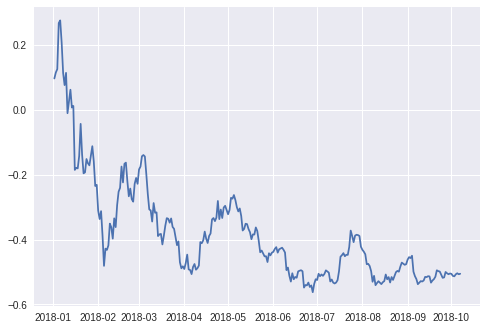

In [7]:
plt.plot(df["cumulative_return"])
plt.show()

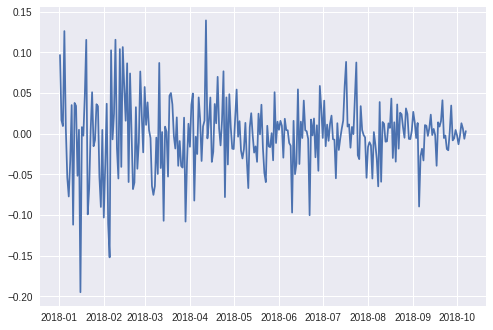

In [8]:
plt.plot(df["daily_return"])
plt.show()

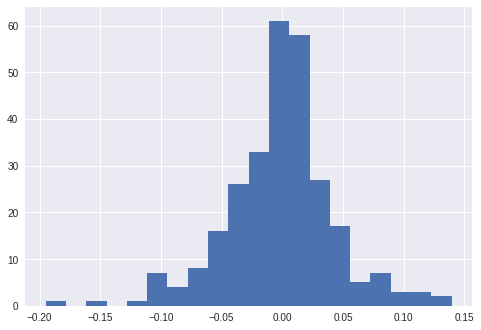

In [9]:
df["daily_return"].fillna(df["daily_return"].mean(), inplace=True)
plt.hist(df["daily_return"], bins=20)
plt.show()